<img src="Images/learning_objectives.png" width="700" height="700">

## Principel Component Analysis (PCA)

- PCA is a well-known algorithm for Dimensionality Reduction

- PCA: 

    - Reduces the number of features while keeping the features information 
    
    - Removes correlations among features
    
    - Emphasizes variation of strong features, making the data easier to visualize

## Check in for Pre-Watching of PCA:

Going forward, it is assumed that you have already watched the following videos:

- What is PCA?: https://www.youtube.com/watch?v=HMOI_lkzW08 

- What is a covariance matrix?: https://www.youtube.com/watch?v=0GzMcUy7ZI0

- How to multiply a matrix with a vector?: https://www.youtube.com/watch?v=Awcj447pYuk 

Are there any questions about these videos?

## Review matrix multiplication

- Matrix `A = np.array([[2, 0], [1, 5]])` and vector `v = np.array([3, 4])` are given.

- **Question:** What is the multiplication of `A` by `v`?

Solve using the following methods:

1. Compute it by hand

1. Write a Python function to compute it (Hint: use the following function form`numpy`: `np.dot(A, v)`)


In [1]:
import numpy as np

A = np.array([[2, 0], [1, 5]])
v = np.array([3, 4])

print(np.dot(A, v))

[ 6 23]


## EigenValue and Eigenvector of matrix

A martix's eigenvalues and eigenvectors are what we will use for the scalar value `a` and vector `v` respectively.

- **Eigenvector** (`v`) is a vector whose direction remains unchanged when a linear transformation is applied to it. They represent the rotation matrix
- **Eigenvalues** (`a`) represents the scalar value that is used such that when multiplied by `v`, gives the same value as `Av`

For given matrix `A`, we want to obtain a vector `v` and a scalar value `a` such that:

`Av = av`

### Write a Python function to obtain vector `v` and scalar `a` for a given matrix `A`

You will use the same matrix `A` that we used above.

**hints:** 

1. Before we find the vector and scalar, we need the eigenvalue and eigenvector of `A`. Given the same matrix `A` we used above, see how [numpy's `linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) method could help you solve this
1. To check your answer, multiply `A` by one of its vectors, and then multiply `a` by the same vector, and see if you get the same outcome

In [4]:
eig_value, eig_vector = np.linalg.eig(A)

print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


So, matrix A has two eigen-values and two eigen-vectors

## Check that Av = av

In [5]:
# multiply A with its first eigen-vector
np.dot(A, eig_vector[:, 0])

array([0., 5.])

In [6]:
# multiply the one eigen-value of A with its associated eigen-vector
eig_value[0]*eig_vector[:, 0]

array([0., 5.])

In [162]:
# Similarly, multiply A with its second eigen-vector
np.dot(A, eig_vector[:, 1])

array([ 1.8973666 , -0.63245553])

In [7]:
# multiply the other eigen-value of A with its associated eigen-vector
eig_value[1]*eig_vector[:, 1]

array([ 1.8973666 , -0.63245553])

## Activity: Are the countries in great UK different in terms of food?

- In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK
- We want to visually represent the diffrence among UK countries based on the food they eat, but this can be difficult when there's 17 types of food (dimensions) to consider. The graph would be incredibly hard to read!
- This is where PCA comes in to play: through PCA, we can consolidate the 17 types into what we call principle components. 
- **Principle Components** allow us to take an arbitrary number of data points (let's say 17) and consolidate them into a single (x, y) datapoint for a given feature.

<img src="Images/pca_UK.png" width="800" height="800">

## Question:

 - Which country is different from the the others? Any idea or reasoning?

## Do it together: Write a function that obtains the principle components from 17 types of food in UK

**Get in groups of 3 for this activity**

**Setup:**

- Download the dataset we will use for this activity: [pca_uk](./Datasets/pca_uk.xlsx)
- Run the following in your terminal:
    - `conda install -c anaconda xlrd`
    - `pip3 install xlrd`

We will use two principle components as an example to see them visually, but we can pick 3 or more principle components as well

**Outline to follow:**

- use pandas to read in the excel spreadsheet (research how pandas can read an excel file)
- build a matrix of the feature values, not including the text labels
- calculate the PCA. This [sklearn module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) may be useful
- Obtain the principle components. This can be done by [applying the dimensionality reduction onto our matrix](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform)

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = pd.read_excel('./Datasets/pca_uk.xlsx')

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


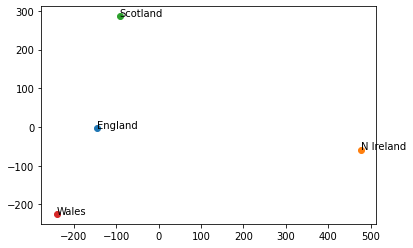

In [18]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

### Answer: Ireland is different from other three countries in UK 

Why is Ireland such an outlier?

## How much of the information in the original dataset is preserved in the principle components?

**Hint:** use [`pca.explained_variance_ratio_`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [170]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


## How to calculate the correlation of the principle components:

In [171]:
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(0.0, 1.0)


## Lets write our own function to obtain principle components

### Activity: PCA Steps

**In groups of 3:** Follow the steps here and write a function that computes the principle components for a dataset similar to the one we watched on YouTube: https://www.youtube.com/watch?v=0GzMcUy7ZI0 

**Steps:**

1. Use the following matrix: `X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])`
1. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
1. Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you...) --> this new matrix will be our covariance matrix.
1. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
1. Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors 
1. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix 
1. Compare the result of custom function with PCA in `sklearn`

In [39]:
import numpy as np
from sklearn.decomposition import PCA
import scipy

# PCA computation by sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))


# Our function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  data - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_n_comp = idx[:n_comp]
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    P = np.dot(C, eig_vector)
    return P


PCA_calculation(X, 2)

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.885780586188048e-16, 0.9999999999999996)
[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[ 1.65392786, -0.2775295 ],
       [ 0.84584087,  0.31153366],
       [-0.55130929,  0.09250983],
       [-1.94845944, -0.126514  ]])

## Question: Is PCA Supervised or Unsupervised?

- Did we use any label to do dimensionality reduction? 

## Activity: Apply Principle to Boston housing features and then train the linear regression model 

- Basically, we remove correlation among features with PCA

- We do not need to do feature data scaling (normalization) when we do PCA for features, because 

- Report the R-squared and MSE for a system with PCA+Linear Regression

## Summary:

- PCA is a mathematical technique to reduce redundancy in data, and is an algorithm for Dimensionality Reduction

- PCA emphasizes variation and strong patterns, making the data easier to visualize

- We use eigenvectors and eigenvalues to obtain the principle component (our new features) in lower dimension

## Resources:

-  http://setosa.io/ev/principal-component-analysis/

In [150]:
def PCA_custom(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    # mean center the data
    data = data - np.mean(data, axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = np.linalg.eig(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:, idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T


print(PCA_custom(X, 2))

[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]
